# Section 0

 # Quantitative Trading -- Limit order study

# Section 1

## Question 1 - Create a function that generates random walks when specified the number of random walks and the number of steps

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


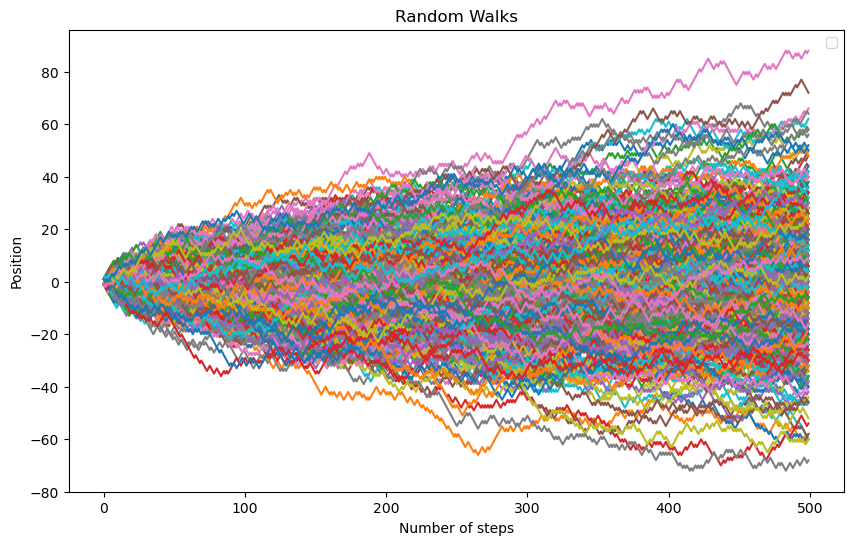

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_walks(num_walks, walk_length):
    """
    Generates 'num_walks' random walks, with 'walk_length' number of steps.

    Inputs:
        - num_walks: int ; Number of Random Walks to generate.
        - walk_length: int ; Number of steps in the Random Walks
    
    Output: np.ndarray of dim: nrows = num_walks ; ncol = walk_length
    """
    # Create an ndarray composed of the random walk increments.
    increments = np.random.choice([-1, 1], size=(num_walks, walk_length))
    # Sum those increments to obtain the Random Walk process
    walks = np.cumsum(increments, axis=1)
    return walks

#Set parameters
num_realizations = 10000
walk_length = 500

#Generate a random walk
random_walks = generate_random_walks(num_realizations, walk_length)

#Plot the result
plt.figure(figsize=(10, 6))
for i in range(501): 
    plt.plot(random_walks[i])

plt.title('Random Walks')
plt.xlabel('Number of steps')
plt.ylabel('Position')
plt.legend()
plt.show()

# Section 2

## Question 2 - Compute the probability of executing a buy limit order with a threshold of -10.

We compute the proportion of paths that never hit the threshold.

In [2]:
# Set parameters
num_realizations = 10000
walk_length = 500
threshold = -10

# We store the walks that never hit the threshold.
last_prices = []
for i in range(num_realizations) :
    # Define a marker: S=0 -> threshold never hit ; S>=1 -> threshold has been hit.
    S = 0
    for j in range(walk_length) :
        if random_walks[i][j]== threshold :
            S+=1
    if S==0 :
        last_prices.append(random_walks[i][-1])

# Count the number of paths that hit the threshold
n = len(last_prices)

# Compute the probability to execute the limit order.
proba_hit = 1-n/10000

print(f"The probability of hitting the limit order at -10 or lower is approximately: {proba_hit}")

The probability of hitting the limit order at -10 or lower is approximately: 0.6567000000000001


# Section 3

## Question 3 - Compute the expected price of the stock knowing that the limit order has not been executed

The expected price of the stock knowing that limit order has not been executed is the average final price for the paths that have not hit the threshold.

In [3]:
#We only consider the path that has not hit the limit order.
average_price_not_hit = np.mean(last_prices)

print(f"If the limit order is not hit, the average price at the end of the period (t={walk_length}) is: {np.mean(last_prices)}")

If the limit order is not hit, the average price at the end of the period (t=500) is: 19.079522283716866


# Section 4

## Question 4 - Compute the cost of the limit order

We can find the cost of the limit order with the Total Expectation Formula.

We ever buy the stock at the threshold level or at the final price if the threshold have not been reached. Without the limit order we woumd have paid 0 (initial price) for the stock.

In [ ]:
# Compute the limit order execution price as the threshold level.
limit_order_price = threshold

# Total Expectation formula.
cost = proba_hit * limit_order_price + (1-proba_hit) * average_price_not_hit
print(f"The cost of the limit order is: {cost}")

The cost of the limit order is: 0.13040000000000163


# Section 5

## Question 5- Plot the limit order execution probability, the stock expected final price and the cost of the limit order against the threshdold level.

In [5]:
def function_calculation (threshold, random_walks=random_walks):
    """
    Computes the limit order execution probability, the stock expected final price and the cost of the limit order given the stocks paths.
    """
    #Retrieve parameters
    num_realizations = len(random_walks)
    walk_length = len(random_walks[0])

    # Compute the probability to execute the limit order

    # List to store the last price of the stocks paths that did not hit the threshold.
    last_prices = []

    for i in range(num_realizations) :
        # Marker: if S=0: threshold was never hit ; S>=1: threshold has been hit.
        S = 0
        for j in range(walk_length) :
            if random_walks[i][j]== threshold :
                S+=1 
        if S==0 :
            last_prices.append(random_walks[i][-1])
    n = len(last_prices)
    proba_hit = 1 - n/10000

    # Expected final price of the stock knowing that the limit order was not executed.
    end_price = np.mean(last_prices)
    
    # Compute the cost of the limit order with Total Expectation formula.
    cost = proba_hit * threshold + (1-proba_hit) * end_price
    return proba_hit, end_price, cost

# Create an array listing thresholds
submission_price=np.arange(0,-51,-1)

# Register the computations for each threshold.
proba_hit_list=[]
end_price_list=[]
cost_list=[]

# Apply the computations to every thresholds
for price in submission_price:
    proba_hit,end_price,cost=function_calculation(price,random_walks)
    proba_hit_list.append(proba_hit)
    end_price_list.append(end_price)
    cost_list.append(cost)

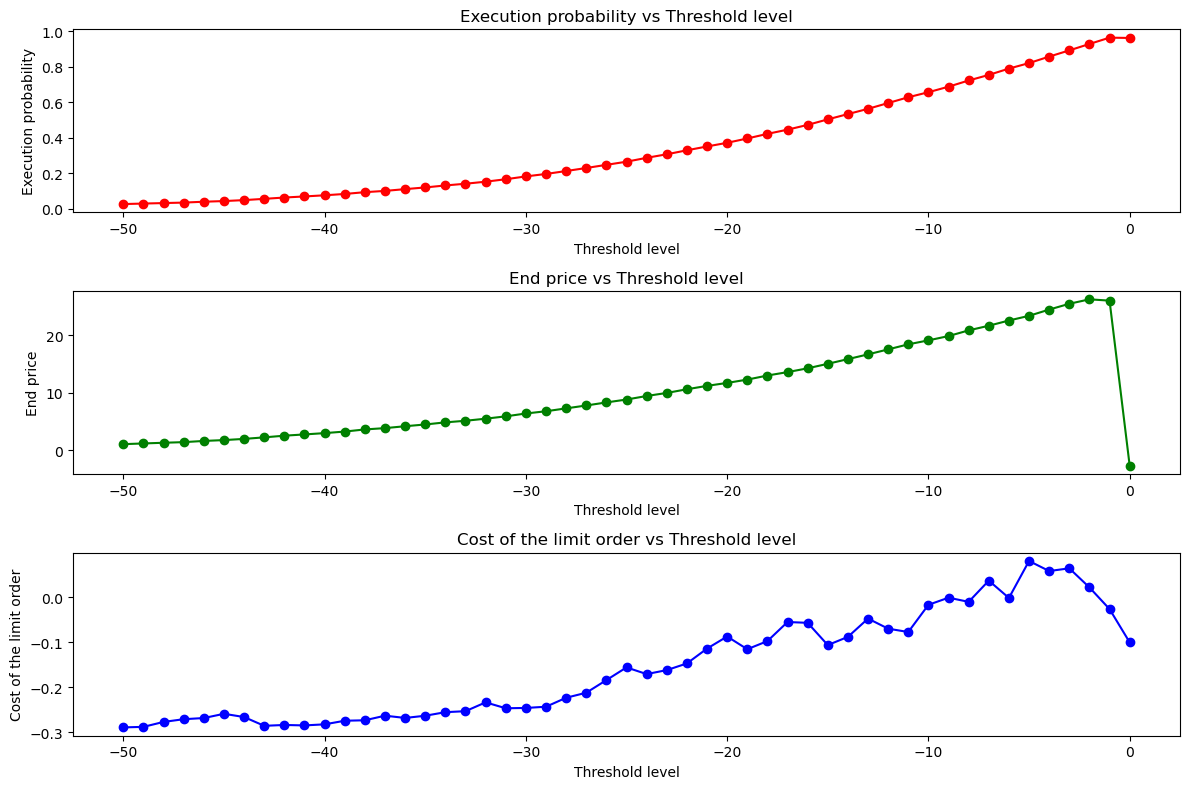

In [7]:
plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
plt.plot(submission_price,proba_hit_list,color='red',marker='o')
plt.title("Execution probability vs Threshold level")
plt.ylabel("Execution probability")
plt.xlabel("Threshold level")

plt.subplot(3,1,2)
plt.plot(submission_price,end_price_list,color='green',marker='o')
plt.title("End price vs Threshold level")
plt.ylabel("End price")
plt.xlabel("Threshold level")

plt.subplot(3,1,3)
plt.plot(submission_price,cost_list,color='blue',marker='o')
plt.title("Cost of the limit order vs Threshold level")
plt.ylabel("Cost of the limit order")
plt.xlabel("Threshold level")

plt.tight_layout()
plt.show()